In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Datasets

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


### Load Dataset

In [3]:
iris = datasets.load_iris()

### Data Information

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
type(iris.data)

numpy.ndarray

In [7]:
type(iris.target)

numpy.ndarray

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Exploratory Data Analysis

In [10]:
X = iris.data
y = iris.target

In [11]:
df = pd.DataFrame(X, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


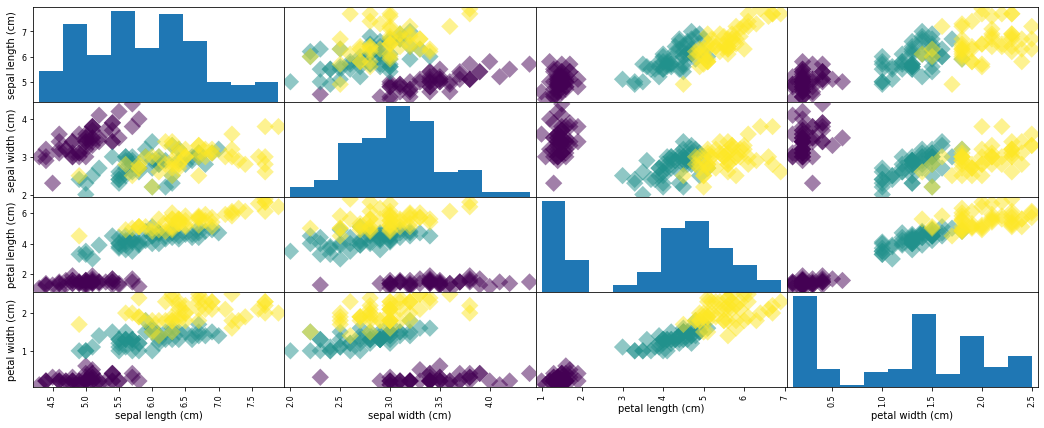

In [12]:
pd.plotting.scatter_matrix(df, c = y, figsize = (18, 7), s = 150, marker = "D")
plt.show()

### K Nearest Neighbors Classification

**Identify best k value**

In [13]:
k_array = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X, y)
    yhat = knn.predict(X)
    accuracy = accuracy_score(y, yhat)
    k_array.append(accuracy)
print(k_array[0:5])

[1.0, 0.98, 0.96, 0.96, 0.9666666666666667]


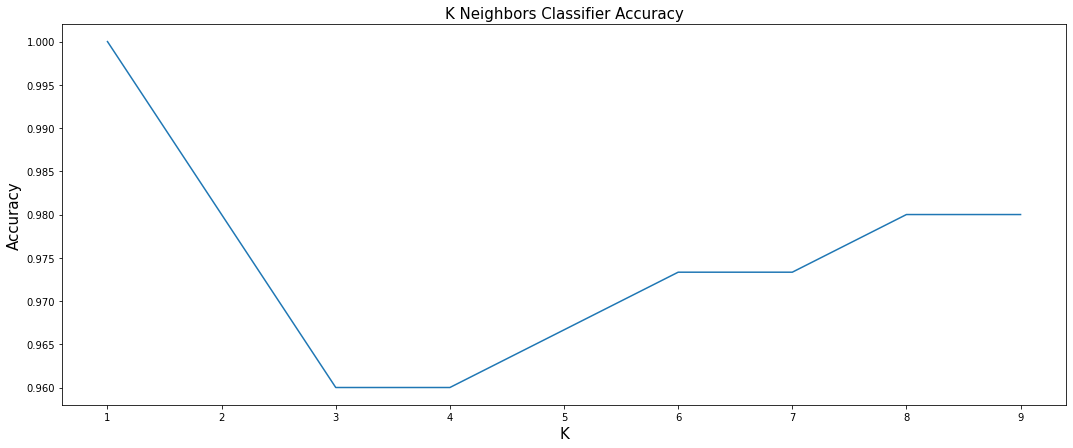

In [14]:
k_list = range(1, 10)
plt.figure(figsize = (18, 7))
plt.plot(k_list, k_array)
plt.xlabel("K", size = 15)
plt.ylabel("Accuracy", size = 15)
plt.title("K Neighbors Classifier Accuracy", size = 15)
plt.show()

**Use K Value = 2**

In [15]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

**Sample Data for Prediction**

In [16]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                  [5.7, 2.6, 3.8, 1.3],
                  [4.7, 3.2, 1.3, 8.2]])

**Prediction**

In [17]:
prediction = knn.predict(X_new)

In [18]:
print(f"Prediction: {prediction}")

Prediction: [1 1 2]


### Train/Test split Method

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 21,
                                                    stratify = y)

**identify best k value**

In [20]:
k_array = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train, y_train)
    yhat = knn.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    k_array.append(accuracy)
print(k_array[0:5])

[0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]


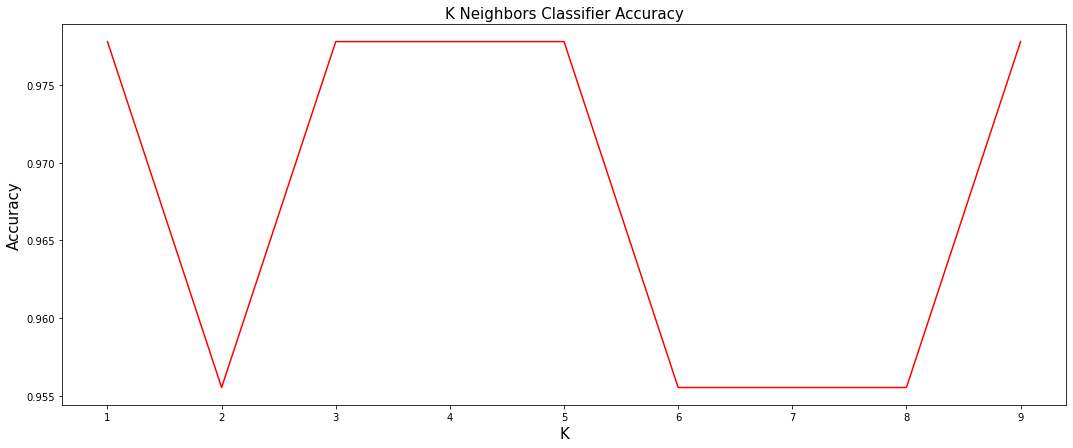

In [21]:
k_list = range(1, 10)
plt.figure(figsize = (18, 7))
plt.plot(k_list, k_array, color = "red")
plt.xlabel("K", size = 15)
plt.ylabel("Accuracy", size = 15)
plt.title("K Neighbors Classifier Accuracy", size = 15)
plt.show()

**Use K Value = 3**

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[0:10]

,Actual,Predicted
0,2,2
1,2,2
2,2,2
3,2,2
4,1,1
5,0,0
6,1,1
7,0,0
8,0,0
9,1,1


In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model =", accuracy.round(2))

Accuracy of Model = 0.98
